In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 產生模擬資料


In [5]:
k = 50
a = 2
b = 5
X = np.random.normal(0, 5, k)
e = np.random.normal(0, 1, k)
Y = X * a + b + e
data = pd.DataFrame({'Y': Y, 'X': X})

In [6]:
data.iloc[0:10,:]

,Y,X
0,26.553575,10.463065
1,8.770008,1.508220
2,-2.185517,-3.263369
3,25.689370,10.409788
4,-0.225532,-3.323798
5,6.526080,0.947342
6,-11.763751,-8.600835
7,-3.801935,-4.093879
8,-0.479750,-3.287128
9,18.688676,6.196096


# 設定損失函數

In [7]:
def loss(Y, Y_hat):
  return(np.mean(np.power(Y_new - data['Y'], 2)))

# 設定回歸模型 f(X) = aX + b

In [8]:
def f(X, a_hat, b_hat):
  Y = X * a_hat + b_hat
  return(Y)

# 開始隨機搜尋訓練

In [9]:
a_hat = 0
b_hat = 0
l_hat = np.Infinity

for i in range(1, 5000):
  a_new = a_hat + np.random.normal(0, 1, 1)
  b_new = b_hat + np.random.normal(0, 1, 1)
  Y_new = f(data['X'], a_new, b_new)
  l_new = loss(data['Y'], Y_new)
  if(l_new < l_hat):
    a_hat = a_new
    b_hat = b_new
    l_hat = l_new
    print('a = ', a_hat ,', b = ', b_hat, 'loss = ', l_hat)
  else:
    a_hat = a_hat
    b_hat = b_hat
    l_hat = l_hat

a =  [-0.97505789] , b =  [1.21220051] loss =  226.97157958528416
a =  [-0.65245067] , b =  [-0.30700055] loss =  206.35803856156062
a =  [-0.36817696] , b =  [1.1974492] loss =  153.22896382940496
a =  [0.51507948] , b =  [1.4067765] loss =  72.14536727885132
a =  [0.67356077] , b =  [3.10213085] loss =  47.95396066674737
a =  [2.16966345] , b =  [5.46624325] loss =  1.9233524288799098
a =  [2.12684869] , b =  [4.99788856] loss =  1.6047771341869475
a =  [1.85818019] , b =  [5.14238106] loss =  1.5789720196628894
a =  [2.0084206] , b =  [4.79534334] loss =  1.4167428689264667
a =  [2.07955477] , b =  [5.44566581] loss =  1.36011276633081
a =  [2.02797391] , b =  [5.37090261] loss =  1.1858102468453655
a =  [1.96363679] , b =  [5.28086984] loss =  1.1618383911690813
a =  [1.97339534] , b =  [5.34032246] loss =  1.1503235105638285
a =  [1.97976511] , b =  [5.29481502] loss =  1.1483109217136092


# 用視覺化診斷預測效果

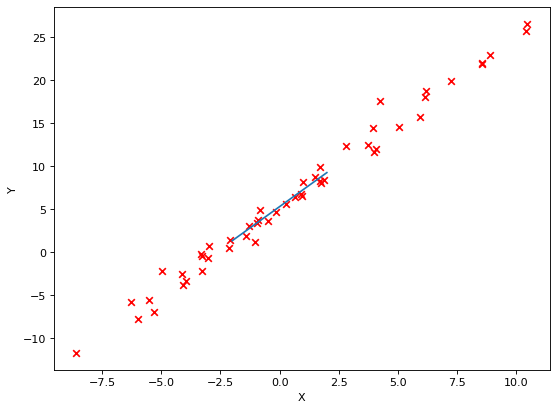

In [12]:
X_sim = [(i / 1000) for i in range(-2000, 2000)]
Y_hat = f(X_sim, a_hat, b_hat)

plt.figure(figsize=(8, 6), dpi = 80)
plt.scatter(data['X'], data['Y'], marker = 'x', color = 'red')
plt.plot(X_sim, Y_hat)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()